In [1]:
import nest
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:32:09

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
config_file = "./v1l4/config_nest.json"
# Instantiate SonataNetwork
sonata_net = nest.SonataNetwork(config_file)

# Create and connect nodes
node_collections = sonata_net.BuildNetwork()
print("Node Collections", node_collections.keys())



Oct 03 10:37:53 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 0.25 ms

Oct 03 10:37:53 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.25 ms.
Node Collections dict_keys(['v1l4', 'bkg'])


In [4]:
# Connect spike recorder to a population
spike_rec = nest.Create("spike_recorder")
nest.Connect(node_collections["v1l4"], spike_rec)

In [5]:
# Attach Multimeter
multi_meter = nest.Create(
    "multimeter",
    params={
        # "interval": 0.05,
        "record_from": ["V_m", "I", "I_syn", "threshold", "threshold_spike", "threshold_voltage", "ASCurrents_sum"],
    },
)
nest.Connect(multi_meter, node_collections["v1l4"])

# Simulate the network
sonata_net.Simulate()


Oct 03 10:38:07 NodeManager::prepare_nodes [Info]: 
    Preparing 6490 nodes for simulation.

Oct 03 10:38:07 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 6490
    Simulation time (ms): 3000
    Number of OpenMP threads: 1
    Not using MPI

Oct 03 10:38:15 SimulationManager::run [Info]: 
    Simulation finished.


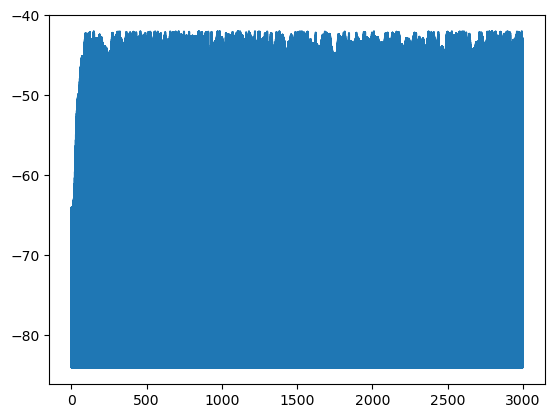

In [6]:
dmm = multi_meter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
#
plt.figure(1)
plt.plot(ts, Vms)

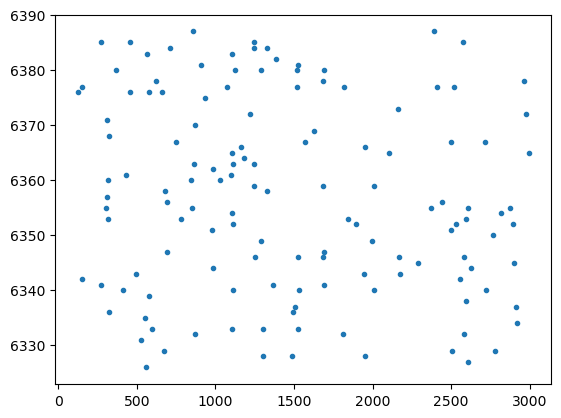

In [9]:
spike_data = spike_rec.events
spike_senders = spike_data["senders"]
ts = spike_data["times"]
plt.figure(2)
plt.plot(ts, spike_senders, ".")
plt.show()